In [2]:
# importing all the necsessary libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [3]:
# Image Directory 

defective_images="/Users/ejbeazleigh/Desktop/Digital images of defective and good condition tyres/defective"
good_images="/Users/ejbeazleigh/Desktop/Digital images of defective and good condition tyres/good"

In [4]:
# See the number of files in each corresponding Image Directory
defective_files= os.listdir(defective_images)
defective_files=len(defective_files)
print(f"No. of Defective Tyres images:{defective_files}")

good_files= os.listdir(good_images)
good_files=len(good_files)
print(f"No. of Good Tyres images:{good_files}")

No. of Defective Tyres images:1028
No. of Good Tyres images:828


In [4]:
######################### Data Visualisation ###############################

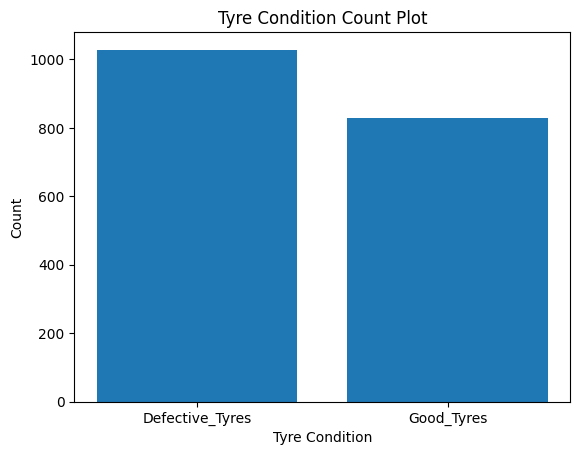

In [5]:
# lets visualise the above numeric data
data = [defective_files, good_files]
keys = ["Defective_Tyres", "Good_Tyres"]

plt.bar(keys,data)
plt.xlabel("Tyre Condition")
plt.ylabel("Count")
plt.title("Tyre Condition Count Plot")
plt.show()

In [6]:
######################## Dividing Datasets ##############################

image_directory="/Users/ejbeazleigh/Desktop/Digital images of defective and good condition tyres"
batch_size=32
img_width=224
img_height=224


train_data = tf.keras.utils.image_dataset_from_directory(image_directory, validation_split=0.2,seed=123,
subset="training",image_size=(img_height, img_width),batch_size=batch_size)

val_data = tf.keras.utils.image_dataset_from_directory(image_directory,validation_split=0.2, seed=123,
subset="validation",image_size=(img_height, img_width),batch_size=batch_size)


Found 1190 files belonging to 2 classes.
Using 952 files for training.
Found 1190 files belonging to 2 classes.
Using 238 files for validation.


In [7]:
# Printing and defining the class names
class_names=train_data.class_names
print(class_names)

for image, label in train_data.take(1):
    print(f"Shape of Images with batch_size:{image.shape}")
    print("----------------------------------------------------------")
    print(f"Total no. of labels contain in one batch:{label.shape}")
    print("----------------------------------------------------------")
    print(f"Check the single image in form of tensors:{image[0]}")
    print("------------------------------------------------------------")
    print(f"Check the label of same image:{class_names[label[0]]}")

['defective', 'good']


2024-01-29 18:44:13.670663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [952]
	 [[{{node Placeholder/_4}}]]
2024-01-29 18:44:13.671524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [952]
	 [[{{node Placeholder/_4}}]]


Shape of Images with batch_size:(32, 224, 224, 3)
----------------------------------------------------------
Total no. of labels contain in one batch:(32,)
----------------------------------------------------------
Check the single image in form of tensors:[[[103.91071  112.91071  121.91071 ]
  [101.440056 110.440056 119.440056]
  [100.87086  108.87086  119.87086 ]
  ...
  [134.6442   134.6442   133.6523  ]
  [104.25052  104.339806 102.071945]
  [ 96.54531   96.54531   94.54531 ]]

 [[108.64285  116.17857  125.91071 ]
  [106.73279  114.2685   124.00064 ]
  [108.49075  115.37118  125.61034 ]
  ...
  [ 98.31242   99.75896  100.41936 ]
  [101.46333  104.92762  103.92762 ]
  [ 96.13685  100.26785   96.77985 ]]

 [[118.40657  124.40657  137.51372 ]
  [120.078445 126.88903  139.59088 ]
  [108.16646  117.05931  127.36575 ]
  ...
  [ 96.94049   98.387024  99.047424]
  [ 91.267944  93.267944  90.267944]
  [ 93.04946   95.04946   92.04946 ]]

 ...

 [[ 68.08929   78.08929   87.08929 ]
  [ 64.298

2024-01-29 18:44:28.526149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [952]
	 [[{{node Placeholder/_4}}]]
2024-01-29 18:44:28.526772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [952]
	 [[{{node Placeholder/_0}}]]


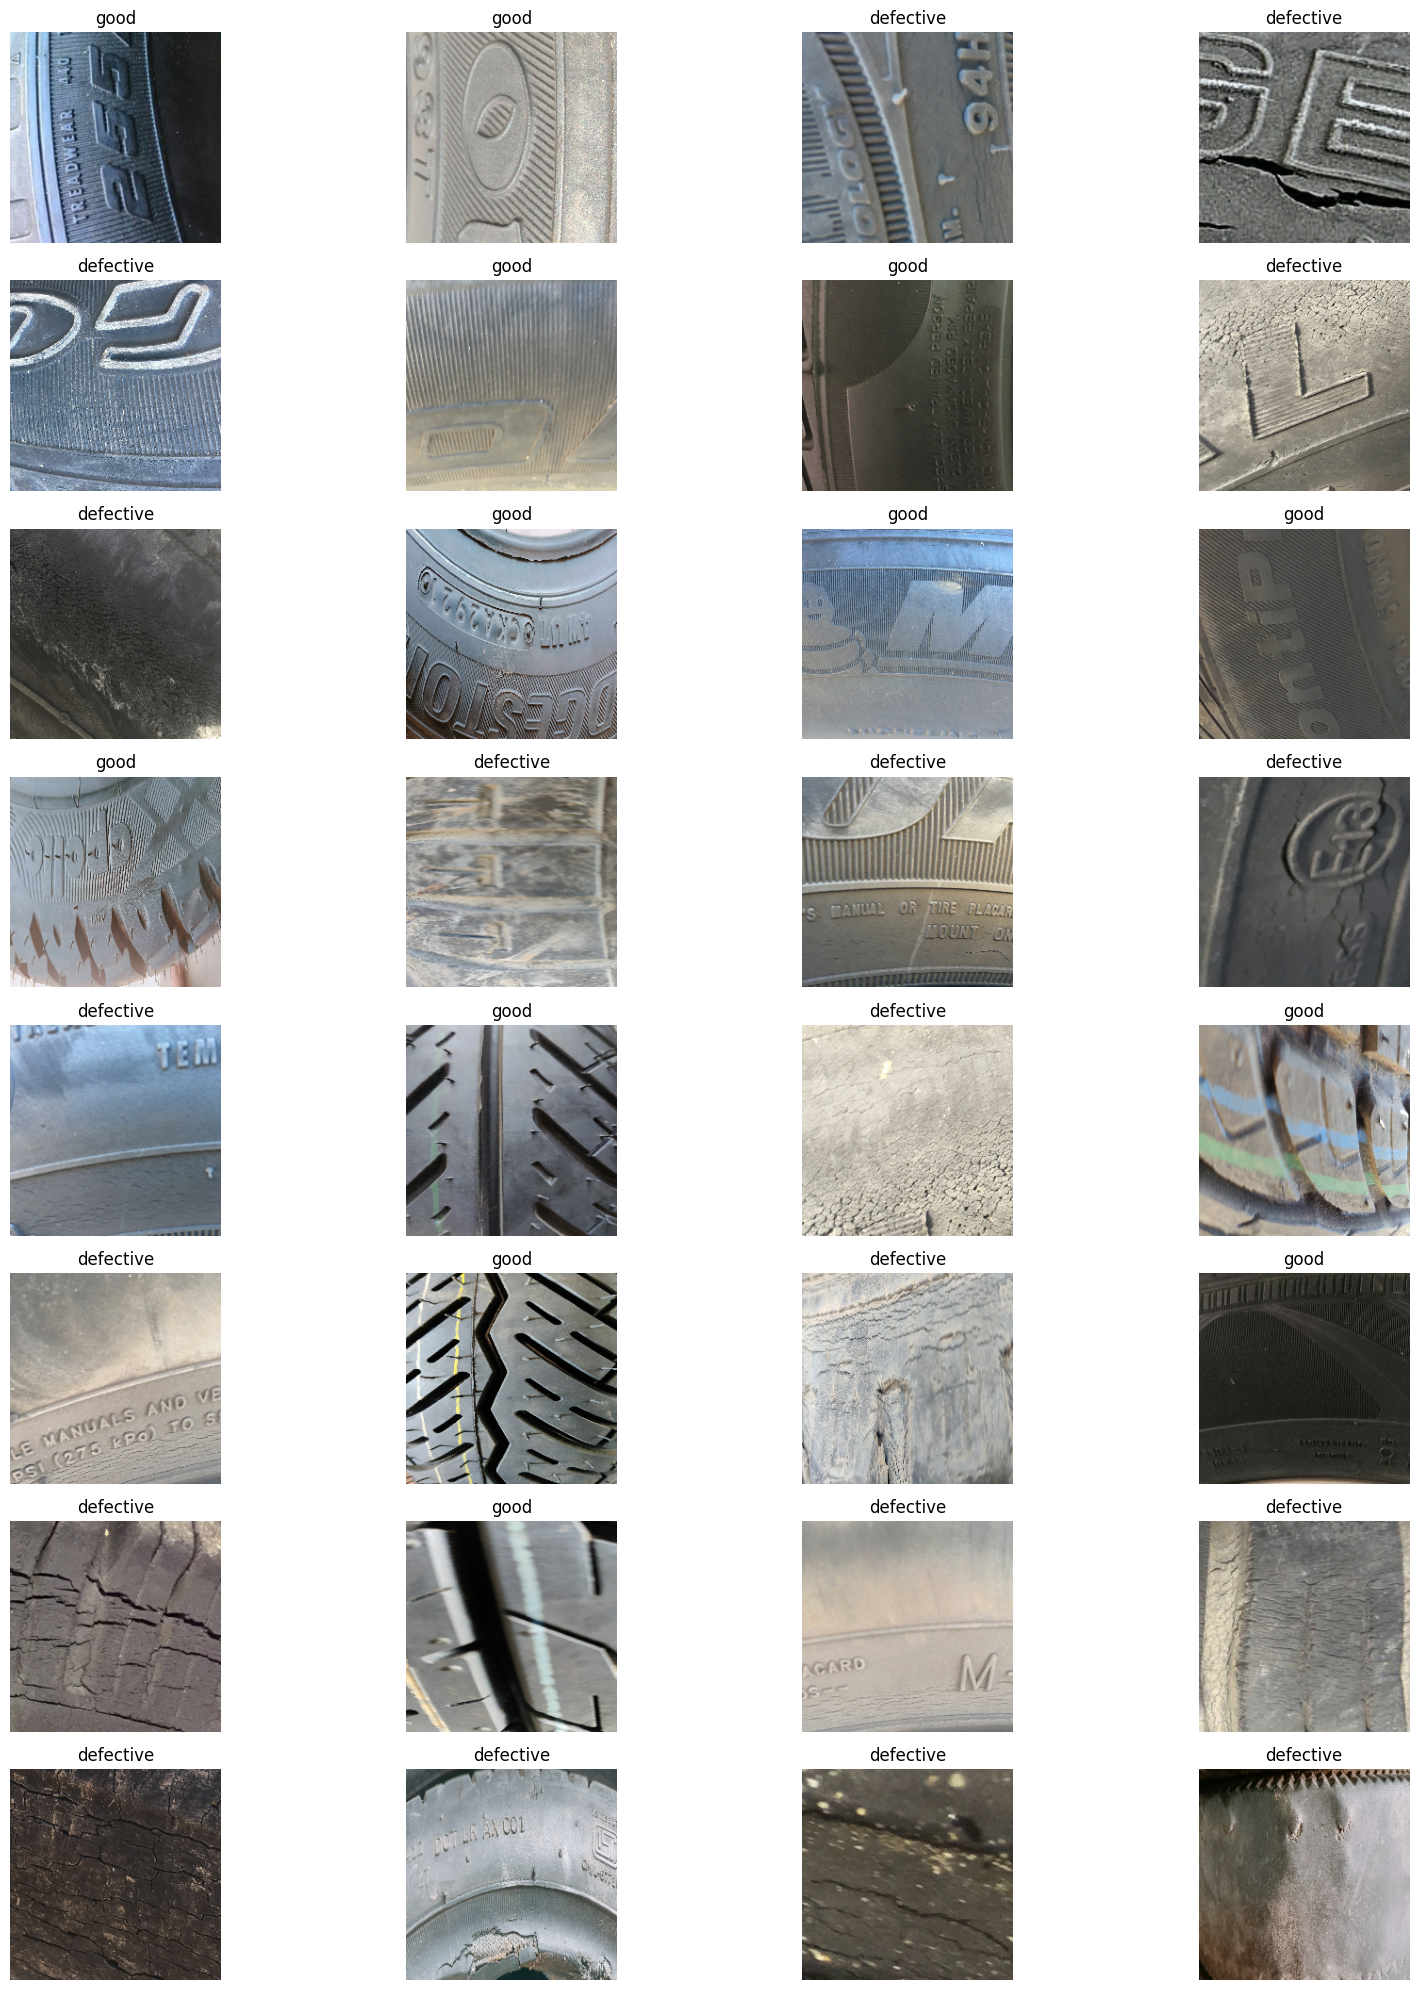

In [8]:
# Plotting the images
plt.figure(figsize=(20,20), tight_layout=True, facecolor="white")
for image, label in train_data.take(1):
    for i in range(32):
        ax=plt.subplot(8, 4, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [9]:
##############mod3l with no hyperparamater tuning#######################

In [10]:
# Define hyperparameters
#learning_rate = 0.001
#batch_size = 32
#epochs = 10
#dropout_rate = 0.5
#dense_units = 512

# Create base model with tf.keras.applications
#base_model = tf.keras.applications.resnet.ResNet50(include_top=False)

# Freeze the base model (so the pre-learned patterns remain the same)
#base_model.trainable = False

# Create inputs into the base model
#inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
#x = base_model(inputs)

# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
#x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(dense_units, activation="relu")(x)
#x = tf.keras.layers.Dropout(dropout_rate)(x)  # Add dropout layer

# Create the output activation layer
#outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# Combine the inputs with the outputs into a model
#model = tf.keras.Model(inputs, outputs, name="model")

# Compile the model with hyperparameters
#model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
 #             optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  # Use learning_rate
 #             metrics=["accuracy"])

# Callbacks
#learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=0.00001, verbose=1)
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Fit the model with hyperparameters
#updatedmodel = model.fit(train_data, epochs=epochs, batch_size=batch_size, validation_data=val_data,
 #                   callbacks=[early_stopping, learning_rate_reduction], verbose=1)


In [11]:
################### ALTERNATE MODEL ################ WITH HYPERPARAMTER TUNING VIA GRIDSEARCH CV

In [12]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the hyperparameters and their testing values 4 grid search

param_grid = { 'learning_rate': [0.001, 0.01],'dropout_rate': [0.2, 0.5, 0.8],'dense_units': [256, 512, 1024],
    'epochs': [5], 'batch_size': [16, 32, 64] }

def create_model(learning_rate=0.001, dropout_rate=0.5, dense_units=512):
    base_model = tf.keras.applications.resnet.ResNet50(include_top=False)
    base_model.trainable = False

    inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
    x = base_model(inputs)
    x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(dense_units, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

    model = tf.keras.Model(inputs, outputs, name="model")
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])
    return model

print('checkpoint 1 reached ed')

# Wrap the model creation function as a KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, verbose=1)

print('checkpoint 2 reached ed')

# Initialize GridSearchCV object with KerasClassifier and parameter grid
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='accuracy', cv=3)

print('checkpoint 3 reached ed')



/var/folders/h7/pb5zg34j4_x_kt0pszyxqj980000gn/T/ipykernel_74278/3645533905.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, verbose=1)


In [ ]:
import numpy as np

# Convert TensorFlow datasets to NumPy arrays
train_data_numpy = np.concatenate([x for x, _ in train_data], axis=0)
train_labels_numpy = np.concatenate([y for _, y in train_data], axis=0)
val_data_numpy = np.concatenate([x for x, _ in val_data], axis=0)
val_labels_numpy = np.concatenate([y for _, y in val_data], axis=0)

# Fit the GridSearchCV object to the data
grid_result = grid_search.fit(train_data_numpy, y=train_labels_numpy, validation_data=(val_data_numpy, val_labels_numpy))

print('checkpoint 5 reached ed')
# Initialize GridSearchCV object with NumPy arrays
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='accuracy', cv=3)

print('checkpoint 6 reached ed')


Epoch 1/5
40/40 [==============================] - 93s 2s/step - loss: 0.9742 - accuracy: 0.5047 - val_loss: 0.7440 - val_accuracy: 0.4790
Epoch 2/5
40/40 [==============================] - 86s 2s/step - loss: 0.6463 - accuracy: 0.6325 - val_loss: 0.8424 - val_accuracy: 0.4244
Epoch 3/5
40/40 [==============================] - 84s 2s/step - loss: 0.5952 - accuracy: 0.6845 - val_loss: 0.7539 - val_accuracy: 0.5084
Epoch 4/5
40/40 [==============================] - 84s 2s/step - loss: 0.5090 - accuracy: 0.7634 - val_loss: 0.7427 - val_accuracy: 0.5966
Epoch 5/5
10/10 [==============================] - 34s 3s/step
Epoch 1/5
40/40 [==============================] - 94s 2s/step - loss: 1.0126 - accuracy: 0.5181 - val_loss: 0.8878 - val_accuracy: 0.4328
Epoch 2/5
40/40 [==============================] - 82s 2s/step - loss: 0.6466 - accuracy: 0.6457 - val_loss: 0.7956 - val_accuracy: 0.4748
Epoch 3/5
40/40 [==============================] - 81s 2s/step - loss: 0.5222 - accuracy: 0.7465 - val_

40/40 [==============================] - 98s 2s/step - loss: 4.5243 - accuracy: 0.4913 - val_loss: 0.8684 - val_accuracy: 0.5840
Epoch 2/5
40/40 [==============================] - 93s 2s/step - loss: 0.7817 - accuracy: 0.5323 - val_loss: 0.6934 - val_accuracy: 0.5588
Epoch 3/5
40/40 [==============================] - 94s 2s/step - loss: 0.6738 - accuracy: 0.5732 - val_loss: 0.7032 - val_accuracy: 0.5378
Epoch 4/5
40/40 [==============================] - 97s 2s/step - loss: 0.6578 - accuracy: 0.6094 - val_loss: 0.7601 - val_accuracy: 0.5000
Epoch 5/5
10/10 [==============================] - 36s 4s/step
Epoch 1/5
40/40 [==============================] - 102s 2s/step - loss: 4.7288 - accuracy: 0.5244 - val_loss: 0.8304 - val_accuracy: 0.4202
Epoch 2/5
40/40 [==============================] - 99s 2s/step - loss: 0.7113 - accuracy: 0.5008 - val_loss: 0.6909 - val_accuracy: 0.5630
Epoch 3/5
40/40 [==============================] - 100s 3s/step - loss: 0.6858 - accuracy: 0.5575 - val_loss: 0.

40/40 [==============================] - 145s 4s/step - loss: 0.8775 - accuracy: 0.5071 - val_loss: 0.6969 - val_accuracy: 0.5210
Epoch 3/10
40/40 [==============================] - 228s 6s/step - loss: 0.7035 - accuracy: 0.5701 - val_loss: 0.7000 - val_accuracy: 0.5210
Epoch 4/10
40/40 [==============================] - 228s 6s/step - loss: 0.6806 - accuracy: 0.5732 - val_loss: 0.6929 - val_accuracy: 0.5252
Epoch 5/10
40/40 [==============================] - 215s 5s/step - loss: 0.6652 - accuracy: 0.6047 - val_loss: 0.7046 - val_accuracy: 0.4958
Epoch 6/10
40/40 [==============================] - 209s 5s/step - loss: 0.6524 - accuracy: 0.6063 - val_loss: 0.7051 - val_accuracy: 0.5546
Epoch 7/10
40/40 [==============================] - 206s 5s/step - loss: 0.6420 - accuracy: 0.6094 - val_loss: 0.7063 - val_accuracy: 0.5420
Epoch 8/10
40/40 [==============================] - 204s 5s/step - loss: 0.6468 - accuracy: 0.6394 - val_loss: 0.7020 - val_accuracy: 0.5504
Epoch 9/10
40/40 [======

Epoch 3/5
40/40 [==============================] - 96s 2s/step - loss: 0.5503 - accuracy: 0.7291 - val_loss: 0.8619 - val_accuracy: 0.4916
Epoch 4/5
40/40 [==============================] - 109s 3s/step - loss: 0.4956 - accuracy: 0.7512 - val_loss: 0.8206 - val_accuracy: 0.5462
Epoch 5/5
10/10 [==============================] - 33s 3s/step
Epoch 1/5
40/40 [==============================] - 95s 2s/step - loss: 1.1597 - accuracy: 0.5024 - val_loss: 0.9861 - val_accuracy: 0.4538
Epoch 2/5
40/40 [==============================] - 89s 2s/step - loss: 0.6605 - accuracy: 0.6189 - val_loss: 0.8407 - val_accuracy: 0.4916
Epoch 3/5
40/40 [==============================] - 88s 2s/step - loss: 0.5587 - accuracy: 0.7181 - val_loss: 0.8427 - val_accuracy: 0.5378
Epoch 4/5
40/40 [==============================] - 82s 2s/step - loss: 0.4885 - accuracy: 0.7780 - val_loss: 0.8534 - val_accuracy: 0.5630
Epoch 5/5
10/10 [==============================] - 489s 7s/step
Epoch 1/5
40/40 [=====================

40/40 [==============================] - 95s 2s/step - loss: 0.6696 - accuracy: 0.6220 - val_loss: 0.7762 - val_accuracy: 0.4916
Epoch 4/5
40/40 [==============================] - 93s 2s/step - loss: 0.6406 - accuracy: 0.6362 - val_loss: 0.7595 - val_accuracy: 0.5126
Epoch 5/5
10/10 [==============================] - 36s 3s/step
Epoch 1/10
40/40 [==============================] - 99s 2s/step - loss: 1.2385 - accuracy: 0.4937 - val_loss: 0.7724 - val_accuracy: 0.5462
Epoch 2/10
40/40 [==============================] - 92s 2s/step - loss: 0.7163 - accuracy: 0.6309 - val_loss: 0.8897 - val_accuracy: 0.4706
Epoch 3/10
40/40 [==============================] - 93s 2s/step - loss: 0.6355 - accuracy: 0.6672 - val_loss: 0.7642 - val_accuracy: 0.5336
Epoch 4/10
40/40 [==============================] - 94s 2s/step - loss: 0.5906 - accuracy: 0.6893 - val_loss: 0.7600 - val_accuracy: 0.5420
Epoch 5/10
40/40 [==============================] - 93s 2s/step - loss: 0.5052 - accuracy: 0.7492 - val_loss:

40/40 [==============================] - 89s 2s/step - loss: 0.6365 - accuracy: 0.6504 - val_loss: 0.7318 - val_accuracy: 0.5714
Epoch 5/10
40/40 [==============================] - 97s 2s/step - loss: 0.6544 - accuracy: 0.6378 - val_loss: 0.7737 - val_accuracy: 0.5504
Epoch 6/10
40/40 [==============================] - 92s 2s/step - loss: 0.6209 - accuracy: 0.6598 - val_loss: 0.7619 - val_accuracy: 0.5126
Epoch 7/10
40/40 [==============================] - 96s 2s/step - loss: 0.5847 - accuracy: 0.7165 - val_loss: 0.7837 - val_accuracy: 0.5252
Epoch 8/10
40/40 [==============================] - 96s 2s/step - loss: 0.5545 - accuracy: 0.7039 - val_loss: 0.8153 - val_accuracy: 0.5546
Epoch 9/10
40/40 [==============================] - 111s 3s/step - loss: 0.5529 - accuracy: 0.6882 - val_loss: 0.8254 - val_accuracy: 0.5084
Epoch 10/10
10/10 [==============================] - 36s 3s/step
Epoch 1/5
40/40 [==============================] - 104s 2s/step - loss: 1.8396 - accuracy: 0.4811 - val_l

In [ ]:
# Fit the GridSearchCV object to the data
grid_result = grid_search.fit(train_data_numpy, y=train_labels_numpy, validation_data=(val_data_numpy, val_labels_numpy))
print('checkpoint 7 reached ed')
# Access the best hyperparameters and model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_.model

print(best_params)

In [ ]:

model.summary()

##################################


tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_dtype=True, dpi=120)

In [ ]:
dataframe=pd.DataFrame(updatedmodel.history)
dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a seaborn color palette
sns.set_palette("husl")

# Get the training history
history = updatedmodel.history

# Convert the training history to a DataFrame
history_df = pd.DataFrame(history)

# Plotting
plt.figure(figsize=(15, 5))

# Loss Plots
plt.subplot(1, 2, 1)
plt.plot(history_df["loss"], label="Training Loss")
plt.plot(history_df["val_loss"], label="Validation Loss")
plt.title('Training Loss and Validation Loss', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy Plots
plt.subplot(1, 2, 2)
plt.plot(history_df["accuracy"], label="Training Accuracy")
plt.plot(history_df["val_accuracy"], label="Validation Accuracy")
plt.title('Training Accuracy and Validation Accuracy', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
####################### Evalauting the model #############################

In [ ]:
loss, accuracy=model.evaluate(val_data)
print(f"Accuracy:{accuracy}")
print(f"Loss:{loss}")

In [ ]:
######################### Predictions ###################################

In [ ]:
x_val=[]
y_val=[]


for image, label in val_data:
    x_val.extend(image.numpy())
    y_val.extend(label.numpy())  
    
predictions=model.predict(np.array(x_val))

y_pred=[int(np.round(prediction)) for prediction in predictions]

In [ ]:
plt.figure(figsize=(35, 35),tight_layout=True, facecolor="white")


for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(x_val[i].astype("uint8"))
    actual_label = class_names[y_val[i]]
    predicted_label = class_names[y_pred[i]]
    
    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color ='blue'
    else:
        label_color = 'red'
    
     
    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color,fontsize=20)
    plt.axis("off")

plt.show()

In [ ]:
# Displaying the classification report
print("Classification Report")
print("-----------------------")
print(classification_report(y_val, y_pred))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

f1_scores = []
precision_scores = []
recall_scores = []

f1_scores.append(f1_score(y_pred, y_val, average="macro"))
precision_scores.append(precision_score(y_pred, y_val, average="macro"))
recall_scores.append(recall_score(y_pred, y_val, average="macro"))

# Print the evaluation scoring metrics
f1 = f1_scores[0]
precision = precision_scores[0]
recall = recall_scores[0]

print("F1-score:", f1)
print("Overall Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

# Creating and visualising the confusion matrix
confusion = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Tyre deterioration classifier')
plt.show()

